# CARTE-Enbridge Bootcamp
#### Lab 1-2

### Scikit-learn Basics

Scikit-learn is a great library to use for doing machine learning in Python. Data preparation, exploratory data analysis (EDA), classification, regression, clustering; it has it all. 

Scikit-learn usually expects data to be in the form of a 2D matrix with dimensions *n_samples x n_features* with an additional column for the target. To get acquainted with scikit-learn, we are going to use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), one of the most famous datasets in pattern recognition. 

Each entry in the dataset represents an iris plant, and is categorized as: 

* Setosa (class 0)
* Versicolor (class 1)
* Virginica (class 2)

These represent the target classes to predict. Each entry also includes a set of features, namely:

* Sepal width (cm)
* Sepal length (cm)
* Petal length (cm)
* Petal width (cm)

In the context of machine learning classification, the remainder of the lab is going to investigate the following question:  
*Can we design a model that, based on the iris sample features, can accurately predict the iris sample class? *

Scikit-learn has a copy of the iris dataset readily importable for us. Let's grab it now and conduct some EDA.

In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()
feature_data = iris_data.data

**YOUR TURN:** "feature_data" now contains the feature data for all of the iris samples. 
* What is the shape of this feature data? (150, 4)
* The data type? float64
* How many samples are there? 150
* How many features are there? 4

In [2]:
# Answer
print(f'Feature data shape: {feature_data.shape}')
print(f'Feature data type: {feature_data.dtype}')
print(f'Number of samples: {feature_data.shape[0]}')
print(f'Number of features: {feature_data.shape[1]}')

Feature data shape: (150, 4)
Feature data type: float64
Number of samples: 150
Number of features: 4


Next, we will save the target classification data in a similar fashion.

In [3]:
target_data = iris_data.target
target_names = iris_data.target_names

**YOUR TURN:**
* What values are in "target_data"? Zeroes, ones and twos corresponding to the three classes
* What is the data type? int64
* What values are in "target_names"? The names of the three classes
* What is the data type? <U10 (unicode string)
* How many samples are of type "setosa"? 50

In [4]:
# Answer
print(f'Target data: {target_data}')
print(f'Target data type: {target_data.dtype}')
print(f'Target names: {target_names}')
print(f'Target names type: {target_names.dtype}')
setosa_index = target_names.tolist().index('setosa')
match_to_setosa = target_data == setosa_index
print(f'Number of samples of type setosa: {match_to_setosa.sum()}')

Target data: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target data type: int64
Target names: ['setosa' 'versicolor' 'virginica']
Target names type: <U10
Number of samples of type setosa: 50


We can also do some more visual EDA by plotting the samples according to a subset of the features and coloring the data points to coincide with the sample classification. We will use [matplotlib](https://matplotlib.org/) as before, to accomplish this, combined with [seaborn](https://seaborn.pydata.org/), a Python library for statistical data visualization.

For example, let's plot sepal width vs. sepal length.


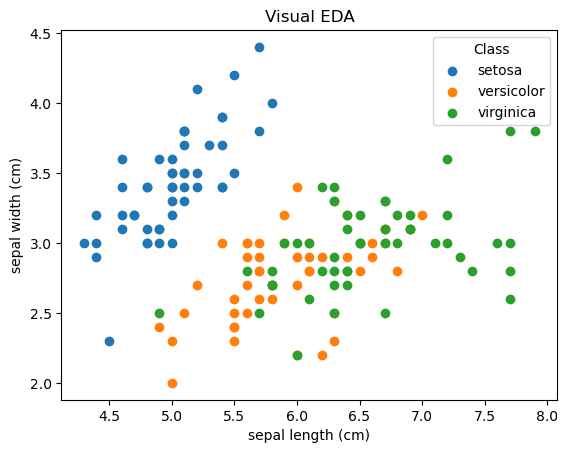

In [5]:
import matplotlib.pyplot as plt

# Preparing data for plotting
setosa = feature_data[target_data == 0]
versicolor = feature_data[target_data == 1]
virginica = feature_data[target_data == 2]

# Plotting setosa
plt.scatter(setosa[:, 0], setosa[:, 1], label="setosa")

# Plotting versicolor
plt.scatter(versicolor[:, 0], versicolor[:, 1], label="versicolor")

# Plotting virginica
plt.scatter(virginica[:, 0], virginica[:, 1], label="virginica")

# Adding labels and title
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Visual EDA")
plt.legend(title="Class")
plt.show()

In the above step, we used boolean indexing to filter the feature data based on the target data class. This allowed us to create a scatter plot for each of the iris classes and distinguish them by color.

*Observations*: We can see that the "setosa" class typically consists of medium-to-high sepal width with low-to-medium sepal length, while the other two classes have lower width and higher length. The "virginica" class appears to have the largest combination of the two. 

**YOUR TURN:** 
* Which of the iris classes is seperable based on sepal characteristics? Setosa
* Which of the iris classes is not? Versicolor and virginica
* Can we (easily) visualize each of the samples w.r.t. all features on the same plot? Why/why not? No, because there are four features and we can only plot two at a time (or three with a 3D plot)

### Creating a k-Nearest Neighbors Classifier

Now that we've explored the data a little bit, we're going to use scikit-learn to create a k-nearest neighbors classifier for the data. Effectively we'll be developing a model whose job it is to build a relationship over input feature data (sepal and petal characteristics) that predicts the iris sample class (e.g. "setosa"). This is an example of a *supervised learning* task; we have all the features and all the target classes.

Nearest neightbors classifiers are quite simple. They predict the class of a new data sample based off the *nearest* data points to that sample. The 'nearest' metric is calculated via a distance function (often [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)). 

<img src="https://github.com/lyeskhalil/mlbootcamp/blob/master/img/knn.png?raw=1" alt="knn" width="200"/>

For example, in the above diagram, suppose we are looking to classify the green circle as either a red triangle, or a blue square. If k = 1 (i.e., we look at one neighbor), our model would predict *red triangle*. If k=2, it would still predict *red triangle*. If k=3, the model would predict *red triangle* as it is the *majority* class of the 3 nearest neighbors. It isn't until k=5 that the algorithm actually predicts *blue square*.

Model creation in scikit-learn follows a **data prep -> fit -> predict** process. The "fit" function is where the actual model is trained and parameter values are selected, while the "predict" function actually takes the trained model and applies it to the new samples.

First, we're going to save our feature data into an array called 'X' and our target data into an array called 'y'. We don't *need* to do this, but it is traditional to think of the problem using this notation.

In [6]:
X = feature_data
y = target_data

Next, we create our nearest neighbor classifier object:

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

And then we *fit* it to the data (i.e., train the classifier).

In [8]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

Now we have a model! If you're new to this, you've officially built your first machine learning model. If you use "knn.predict(*[[feature array here]]*)", you can use your trained model to predict the class of a new iris sample. 

**YOUR TURN:**
* What is the predicted class of a new iris sample with feature vector [3,4,5,2]? What is its name? 2, virginica
* Do you think this model is overfit or underfit to the iris dataset? Why? Overfit, because it has 100% accuracy on the training data
* How many neighbors does our model consider when classifying a new sample? 1

In [9]:
# Answer
new_sample = [3, 4, 5, 2]
prediction = knn.predict([new_sample]) # Have to wrap the sample in a list, because the method expects a list of samples
prediction_label = target_names[prediction][0]
print(f'Predicted class: {prediction[0]}')
print(f'Predicted class name: {prediction_label}')

Predicted class: 2
Predicted class name: virginica


As you may have noted in the previous cell, we've trained this classifier on our *entire dataset*. This typically isn't done in practice and results in overfitting to the data. Here's a bit of a tricky question:

**YOUR TURN:**
* If we use our classifier to predict the classes of the iris samples that were used to train the model itself, what will our overall accuracy be? 100%, because we're predicting the same data we trained on

We can validate our hypothesis fairly easily using either: i) the NumPy technique for calculating accuracy we used earlier in the lab, or ii) scikit-learn's in-house "accuracy_score()" function.

Let's use our technique first:

In [10]:
import numpy as np

accuracy = np.mean(target_data == knn.predict(feature_data))
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 100.0%


and then using scikit-learn's customized function:

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_data, knn.predict(feature_data))
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 100.0%


We see that our classifier has achieved 100% accuracy (and both calculation methods agree)!

**DISCUSSION:** 
* Why do you think the model was able to achieve such a "great" result? Because it was trained on the same data it was tested on
* What does this really tell us?  Nothing about how well the model will perform on new data
* Do you expect the model to perform this well on new data? We don't know, but we can't assume it will

### Cross Validation

A popular way to mitigate this overfitting issue is to train your model on *some* of the data (the training set) and validate your model on the remaining data (the validation set). You will then select the model/configuration that performs best on the validation data. The train/validate division of the data is usually done with a 70%/30% split. Often, practitioners will use a third data set, the test set (or hold-out set), to get a sense for how their best model performs on unseen, real-world data. In this scenario, you will tune your models to perform best on the validation set and then test their "real-world" performance on the unseen test set.

Sometimes applications don't have enough data to do these splits meaningfully (e.g., the test data is only a few samples). In these cases, *cross-validation* is a useful technique (and, indeed, has become standard in machine learning practice). 

The general premise of "k-folds" cross validation is to first divide the entire dataset (grey) into a training set (green) and a test set (unseen data, blue). Then, we divide the training set into different folds and use these folds to form new sub-training and sub-test sets. We select the model configuration that performs the best on all of these. The below figure provides a nice visualization for what's going on here:

<img src="https://github.com/lyeskhalil/mlbootcamp/blob/master/img/cross-val.png?raw=1" alt="cross-val" width="500"/>


Accomplishing k-folds cross validation in scikit-learn is a manageable task. First, we divide our data into a train and test set, then we conduct the cross validation and look at the mean scores across the splits, then we conduct our final evaluation.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    feature_data, target_data, test_size=0.3, random_state=0
)

We have divided our data into two sections: training data (70% of the data) and testing data (30% of the data). Now we will fit our nearest neighbors classifier to the training data with 5 folds and see how it performs.

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 1.96:.2f})")

Accuracy: 0.94 (+/- 0.11)


Our cross-validated model has an accuracy of 94% across all the splits on the training data. If we think that is a reasonable value, we can train our final model on the training data and then see how it performs on the held-out test data. 

##### Comparing classifiers
However, to get a true sense for the utility of cross-validation, let's create a second nearest neighbors classifier that uses two neighbors instead of one. 

In [14]:
knn_2_neighbors = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(knn_2_neighbors, X_train, y_train, cv=5)
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 1.96:.2f})")

Accuracy: 0.92 (+/- 0.13)


As we see above, our second classifier (the one with two neighbors) actually performs worse when cross-validated (92% vs. 94% mean accuracy on the 5 folds)! So, we'll stick with the first one.

Evaluating the model on held-out test data is a critical step in assessing its performance. By using data that the model has not seen during training, we can gauge how well the model generalizes to new, unseen data. This provides a more realistic estimation of how the model would perform in a real-world scenario where it encounters data points it has not seen before.

Let's train the chosen model on the training data and use it to predict the final held-out test data. Evaluating on the test data will help us understand the model's ability to generalize, which is a key aspect of a reliable and robust machine learning model.

In [15]:
knn.fit(X_train, y_train)
accuracy = accuracy_score(y_test, knn.predict(X_test))
print(f"Test set accuracy: {accuracy * 100:.2f}%")

Test set accuracy: 97.78%


And we see our model has a 97.8% accuracy on the held out test data (30% of the original dataset).

## Bonus Task: Confusion Matrix Analysis

A confusion matrix is a table used to describe the performance of a classification model on a set of data for which the true values are known. It is especially powerful for multi-class classification, like our iris dataset.

In this bonus task, you will create a confusion matrix for the k-nearest neighbors classifier you trained earlier on the test data. Then, calculate specific metrics like precision, recall, and F1-score for each class. Here's a step-by-step guide to help you get started:

1. Predict the Test Data: You've already done this, so you can simply use the predictions you made for the test data. 
2. Create the Confusion Matrix: You can use scikit-learn's confusion_matrix function for this.
3. Analyze the Matrix: Calculate precision, recall, and F1-score for each class. You might find scikit-learn's classification_report helpful or calculate them manually.

Below is a snippet to help you create the confusion matrix. The rest is up to you!

In [16]:
from sklearn.metrics import confusion_matrix

# Predict the test data
y_pred = knn.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Now it's your turn to analyze this matrix and calculate precision, recall, and F1-score for each class!

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [17]:
# Answer
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45
